In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.special import gammainc

# Functions 

In [5]:
def sigma(sig_ln, F0, alpha):
    ''' Compute sigma'''
    return sig_ln * F0**(1-alpha)

def X(F, alpha, sig):
    ''' X transform variable '''
    return F**(2 * (1-alpha)) / (sig**2 * (1-alpha)**2)

def F_Xinv(X, alpha, sig):
    ''' F from X'''
    return (X * (sig**2 * (1-alpha)**2)) ** (1/(2*(1-alpha)))

def delta(alpha):
    ''' delta from alpha'''
    return (1 - 2*alpha) / (1 - alpha)

def em_CEV(T, dt, F0, alpha, sig):
    ''' Euler scheme simulation '''
    
    # set up Brownian motion and t
    t = np.arange(dt, T + dt, dt)
    N = len(t)
    dW=np.sqrt(dt)*np.random.randn(N)
    
    # init variables
    X0 = X(F0, alpha, sig)
    d = delta(alpha)
    X_emC, X_em = X0, []
    hit_zero = False
    
    # For all timesteps
    for j in range(N):
        # euler (X + XdX)=(X + X * (d*dt + 2X^(1/2)dW))
        dX = d*dt + 2*np.sqrt(X_emC)*dW[j]
        X_emC += dX
        
        # if <= 0, presumed it hit boundary of 0
        if X_emC <= 0:
            # fill with 0's since it is absorbed
            X_em += [0 for i in range(N - len(X_em))]
            hit_zero = True
            break
        X_em.append(X_emC)
    
    return X_em, hit_zero



def mil_CEV(T, dt, F0, alpha, sig):
    ''' Milstein scheme simulation '''
    
    # set up Brownian motion and t
    t = np.arange(dt, T + dt, dt)
    N = len(t)
    dW=np.sqrt(dt)*np.random.randn(N)
    
    # init variables
    X0 = X(F0, alpha, sig)
    d = delta(alpha)
    X_milC, X_mil = X0, []
    hit_zero = False
    
    # For all timesteps
    for j in range(N):
        # Milstein 
        dX = d*dt + 2*np.sqrt(X_milC)*dW[j] + 2*(dW[j]**2 - dt)
        X_milC += dX
        
        # if <= 0, presumed it hit boundary of 0
        if X_milC <= 0:
            # fill with 0's since it is absorbed
            X_mil += [0 for i in range(N - len(X_mil))]
            hit_zero = True
            break
        X_mil.append(X_milC)
    
    return X_mil, hit_zero
    
    

# CEV Process for K = 90, 100, 110

In [8]:

# parameters
dt = 2**(-4)
F = 100
alpha = 0
sig_ln = 0.5
T = 4
K = 100
# transform sig to correct dimension
sig = sigma(sig_ln, F, alpha)

# Monte Carlo of CEV Process
N = 10**(6)
t = np.arange(dt, T + dt, dt)
X_T = np.zeros(N)
num_absorbed = 0
for i in range(N):
    em, hz = mil_CEV(T, dt, F, alpha, sig)
    num_absorbed += int(hz)
    # save final X values
    X_T[i] = em[-1]
    # plt.plot(t, em, alpha=0.5)

# compute inverse to get F
F_T = F_Xinv(X_T, alpha, sig)
# compute C by subtracting K and taking max. Anywhere less than K is 0, otherwise F - K
C = np.where(F_T<K, 0, F_T-K)
P = C - (F_T - K)
# print(C)
# print(C[np.argwhere(C).flatten()])
print(f"E[C] = {C.mean()}, STD[C] = {C.std()/(N**(1/2))}")
print(f"E[P] = {P.mean()}, STD[P] = {P.std()/(N**(1/2))}")
print(f"Simulated Absorbed Ratio = {num_absorbed/N}")
print(f"Analytical Absorbed Ratio = {1-gammainc(-(delta(alpha)/2 - 1), X(F, alpha, sig)/(2*T))}")
# plt.ylim(0, 10)
# plt.show()

E[C] = 39.43201799097146, STD[C] = 0.05871620149100748
E[P] = 36.443420898517935, STD[P] = 0.04353302117463787
Simulated Absorbed Ratio = 0.272902
Analytical Absorbed Ratio = 0.31731050786291415


E[C] = 39.19677239384701, STD[C] = 0.058322419945813234
E[P] = 37.68912541853706, STD[P] = 0.04429665047338302
Simulated Absorbed Ratio = 0.292748
Analytical Absorbed Ratio = 0.31731050786291415


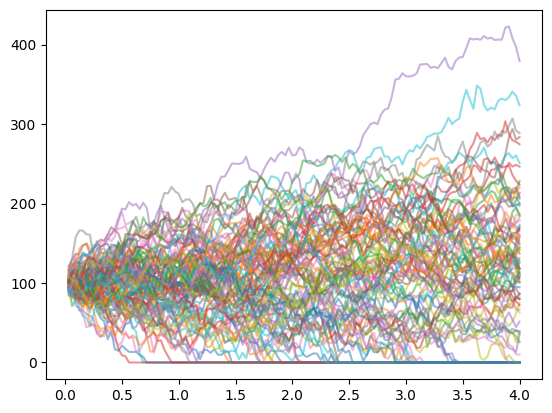

In [23]:
def em_CEV(T, dt, F0, alpha, sig):
    ''' Euler scheme simulation '''
    
    # set up Brownian motion and t
    t = np.arange(dt, T + dt, dt)
    N = len(t)
    dW=np.sqrt(dt)*np.random.randn(N)
    
    # init variables
    d = delta(alpha)
    X_emC, X_em = F0, []
    hit_zero = False
    
    # For all timesteps
    for j in range(N):
        # euler (X + XdX)=(X + X * (d*dt + 2X^(1/2)dW))
        dX = sig * X_emC**alpha * dW[j]
        X_emC += dX
        
        # if <= 0, presumed it hit boundary of 0
        if X_emC <= 0:
            # fill with 0's since it is absorbed
            X_em += [0 for i in range(N - len(X_em))]
            hit_zero = True
            break
        X_em.append(X_emC)
    
    return X_em, hit_zero

def mil_CEV(T, dt, F0, alpha, sig):
    ''' Euler scheme simulation '''
    
    # set up Brownian motion and t
    t = np.arange(dt, T + dt, dt)
    N = len(t)
    dW=np.sqrt(dt)*np.random.randn(N)
    
    # init variables
    d = delta(alpha)
    X_emC, X_em = F0, []
    hit_zero = False
    
    # For all timesteps
    for j in range(N):
        # euler (X + XdX)=(X + X * (d*dt + 2X^(1/2)dW))
        dX = sig * X_emC**alpha * dW[j]
        X_emC += dX
        
        # if <= 0, presumed it hit boundary of 0
        if X_emC <= 0:
            # fill with 0's since it is absorbed
            X_em += [0 for i in range(N - len(X_em))]
            hit_zero = True
            break
        X_em.append(X_emC)
    
    return X_em, hit_zero

# parameters
dt = 2**(-5)
F = 100
alpha = 0
sig_ln = 0.5
T = 4
K = 100
# transform sig to correct dimension
sig = sigma(sig_ln, F, alpha)

# Monte Carlo of CEV Process
N = 10**(6)
t = np.arange(dt, T + dt, dt)
X_T = np.zeros(N)
num_absorbed = 0
for i in range(N):
    em, hz = em_CEV(T, dt, F, alpha, sig)
    num_absorbed += int(hz)
    # save final X values
    X_T[i] = em[-1]
    if i % N//100 == 0:
        plt.plot(t, em, alpha=0.5)

# compute inverse to get F
F_T = X_T#F_Xinv(X_T, alpha, sig)
# compute C by subtracting K and taking max. Anywhere less than K is 0, otherwise F - K
C = np.where(F_T<K, 0, F_T-K)
P = C - (F_T - K)
# print(C)
# print(C[np.argwhere(C).flatten()])
print(f"E[C] = {C.mean()}, STD[C] = {C.std()/(N**(1/2))}")
print(f"E[P] = {P.mean()}, STD[P] = {P.std()/(N**(1/2))}")
print(f"Simulated Absorbed Ratio = {num_absorbed/N}")
print(f"Analytical Absorbed Ratio = {1-gammainc(-(delta(alpha)/2 - 1), X(F, alpha, sig)/(2*T))}")
# plt.ylim(0, 10)
plt.show()

In [84]:
def analytical_C(F,K,T, alpha, sig):
    K_tilde = X(K,alpha, sig)
    X0 = X(F,alpha, sig)
    v = delta(alpha)/2 - 1
    C = F * (1 - stats.ncx2.cdf(x = K_tilde/T, df = 4 - delta(alpha), nc = X0/T)) - K * stats.ncx2.cdf(x = X0/T, df = 2 - delta(alpha),nc = K_tilde/T)
    
    return C
    # C = np.where(C < 0, 0, C)
    # C_idx = np.argwhere(C).flatten()
    # print(C[C_idx].mean())
    # print(C.mean())


In [85]:
F = 100
alpha = -2
sig_ln = 0.5
T = 4
K = 100
# transform sig to correct dimension
sig = sigma(sig_ln, F, alpha)
print(F, alpha, sig_ln, sig, T, K)
ana_C = analytical_C(F, K, T, alpha, sig)
ana_P = ana_C + K - F
print(ana_C, ana_P)

100 -2 0.5 500000.0 4 100
34.429275142951404 34.42927514295141


In [123]:

# Parameters
F = 100
alpha = 0
sig_ln = 0.5
T = 4
K = 100
# transform sig to correct dimension
sig = sigma(sig_ln, F, alpha)

# Umax
v = delta(alpha)/2 - 1
X0 = X(F, alpha, sig)
Umax = gammainc(-v, X0/(2*T))

# U
s = stats.qmc.Sobol(1)
M = 20
N = 2**M
U = s.random_base2(M).flatten()


absorbed = U > Umax
print(f"Sim Absorbed: {np.count_nonzero(absorbed)/N}")
print(f"Ana Absorbed: {1 - gammainc(-v, X0/(2*T))}")


XoverT = np.zeros(N)
not_absorbed = ~absorbed
print(X0/T)
print(Umax)
print(U[not_absorbed])
print(Umax - U[not_absorbed])
XoverT[not_absorbed] = Umax - stats.ncx2.ppf( U[not_absorbed], df = 2 - delta(alpha), nc = X0/T)


# XoverT = stats.ncx2.rvs( df= 2 - delta(alpha), nc=U)


# x = np.linspace(0,5, 4000)
# y = stats.ncx2.pdf(x, df = 2-delta(alpha), nc = X0/T)
# plt.plot(x,y)

# XoverT[absorbed] = 0
# plt.hist(XoverT, density=True, bins='auto')

X_T = XoverT * T
print(X_T)
# compute inverse to get F_T
F_T = F_Xinv(X_T, alpha, sig)
# compute C by subtracting K and taking max. Anywhere less than K is 0, otherwise F - K
C = np.where(F_T<K, 0, F_T-K)

P = C - (F_T - K)


print(C.mean())
print(analytical_C(F,K,T,alpha,sig))

Sim Absorbed: 0.3173103332519531
Ana Absorbed: 0.31731050786291415
1.0
0.6826894921370859
[0.2921269  0.10733842 0.52864374 ... 0.52864308 0.10733906 0.29212579]
[0.39056259 0.57535107 0.15404575 ... 0.15404641 0.57535044 0.3905637 ]
[0.         2.63900108 5.9881636  ... 5.98814885 2.6390165  0.        ]
49.30767112892735
39.045157778460286


(array([2.45747522e-04, 9.01074249e-04, 1.80214850e-03, 2.94897027e-03,
        5.32452965e-03, 7.20859399e-03, 1.22873761e-02, 1.83491483e-02,
        1.94140543e-02, 2.36736780e-02, 2.81790492e-02, 3.24386730e-02,
        3.47323165e-02, 3.44865690e-02, 4.01387620e-02, 4.10398362e-02,
        4.15313313e-02, 4.21047422e-02, 3.73536234e-02, 4.02206778e-02,
        3.76812868e-02, 3.67802125e-02, 3.59610541e-02, 3.07184403e-02,
        3.16195145e-02, 2.54758265e-02, 2.11342869e-02, 2.13800344e-02,
        1.81853167e-02, 1.49086830e-02, 1.49086830e-02, 1.13863019e-02,
        9.50223753e-03, 7.70008903e-03, 7.37242567e-03, 5.07878213e-03,
        5.16069797e-03, 4.17770788e-03, 2.62130691e-03, 2.70322275e-03,
        1.63831682e-03, 1.55640097e-03, 1.47448513e-03, 9.82990089e-04,
        1.39256929e-03, 9.01074249e-04, 4.91495045e-04, 6.55326726e-04,
        3.27663363e-04, 8.19158408e-05, 2.45747522e-04, 1.63831682e-04,
        2.45747522e-04, 0.00000000e+00, 8.19158408e-05, 8.191584

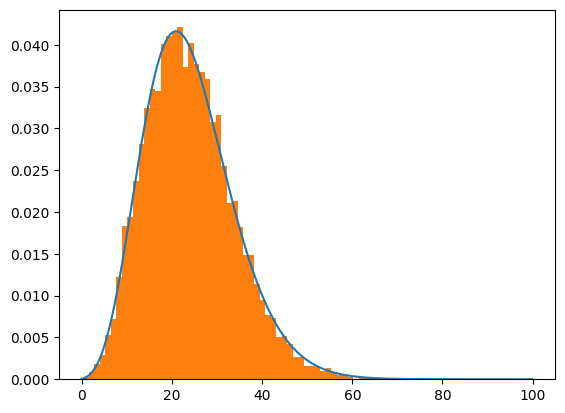

In [52]:

def ar_method(X0, T, alpha, N ):
    xmin = 0; xmax = 100
    x = np.linspace(xmin, xmax, 500); px = stats.ncx2.pdf(X0/T, df = 2 - delta(alpha), nc =x)
    M = 0.05; n_accept = 0; x_list = [];n_try = 0

    #stats.qmc.Sobol()
    while n_accept < N:
        n_try += 1
        t = np.random.uniform(xmin, xmax)
        y = np.random.rand()
        if y < stats.ncx2.pdf(X0/T, df = 2 - delta(alpha), nc = t)/M:
            n_accept += 1; x_list.append(t)
            
    return np.array(x_list)
    # plt.plot(x, px)
    # _=plt.hist(x_list, density=True, bins='auto')

In [123]:
dt = 2**(-4)

# parameters
F = 100
sig_ln = 0.2
T = 1
K = 100
alpha = 7

sig = sigma(sig_ln, F, alpha)

# Monte Carlo
N = 1000000
t = np.arange(dt, T + dt, dt)
X_T = []
counter = 0
for i in range(N):
    em, hit_zero = em_CEV(T, dt, F, alpha, sig)
    if hit_zero:
        continue
    X_T.append(em[-1])
    counter += 1
    # plt.plot(t, em, alpha=0.5)
    
X_T = np.array(X_T)
# compute inverse to get F
F_T = F_Xinv(X_T, alpha, sig)
# compute C by subtracting K and taking max. Anywhere less than K is 0, otherwise F - K
C = np.where(F_T<K, 0, F_T-K)
P = C - (F_T - K)
# print(C)
# print(C[np.argwhere(C).flatten()])
print(f"E[C] = {C.mean()}, STD[C] = {C.std()/(counter**(1/2))}")
print(f"E[P] = {P.mean()}, STD[P] = {P.std()/(counter**(1/2))}")
# print(f"Simulated Absorbed Ratio = {num_absorbed/N}")
# print(f"Analytical Absorbed Ratio = {1-gammainc(-(delta(alpha)/2 - 1), X(F, alpha, sig)/(2*T))}")
# plt.ylim(0, 10)
# plt.show()

# plt.ylim(0, 10)
# plt.show()

KeyboardInterrupt: 

In [111]:
# Local martingale for F_T

def analytical_C_2(F, K,T, alpha, sig):
    K_tilde = X(K,alpha, sig)
    X0 = X(F,alpha, sig)
    print(delta(alpha))
    v = delta(alpha)/2 - 1
    print(v)
    F_T = F * (gammainc(v, X0/(2*T)))

    X_T = X(F_T, alpha, sig)
    print(F_T, X_T, X0)

    C = F * (gammainc(v, X0/(2*T)) - stats.ncx2.cdf(x = X0/T, df = delta(alpha) - 2, nc = X0/T)) - K * stats.ncx2.cdf(x = K_tilde/T, df = delta(alpha),nc = X0/T)

    print(C)
    # C = np.where(C < 0, 0, C)
    # C_idx = np.argwhere(C).flatten()
    # print(C[C_idx].mean())
    # print(C.mean())



In [125]:
F = 100
sig_ln = 0.2
T = 1
K = 100
alpha = 6.5
sig = sigma(sig_ln, F, alpha)
analytical_C_2(F, K, T, alpha, sig)

2.1818181818181817
0.09090909090909083
93.62078925858074 1.7065513114087554 0.8264462809917357
2.0604360207136097


In [63]:
delta(10)

2.111111111111111

(array([0.00242297, 0.00403828, 0.00242297, 0.00484593, 0.00242297,
        0.0072689 , 0.01211483, 0.01615311, 0.01938373, 0.02826794,
        0.03876746, 0.04119042, 0.05815119, 0.06622774, 0.0904574 ,
        0.12357127, 0.14699327, 0.16718466, 0.19464494, 0.23018178,
        0.23179709, 0.32306214, 0.30287076, 0.32871573, 0.36829084,
        0.41109658, 0.36021429, 0.40463533, 0.40867361, 0.40059706,
        0.38121333, 0.3472918 , 0.34648415, 0.30852435, 0.28994827,
        0.26329565, 0.25118082, 0.20675977, 0.18576073, 0.15345452,
        0.12195596, 0.09934161, 0.07349664, 0.06380477, 0.04926698,
        0.04199808, 0.02746028, 0.02019138, 0.01534545, 0.01292249,
        0.00807655, 0.00403828, 0.00242297, 0.00161531, 0.        ,
        0.00242297, 0.00080766, 0.00080766]),
 array([-3.47866664, -3.35485145, -3.23103626, -3.10722107, -2.98340588,
        -2.85959069, -2.73577551, -2.61196032, -2.48814513, -2.36432994,
        -2.24051475, -2.11669956, -1.99288437, -1.86906919, 

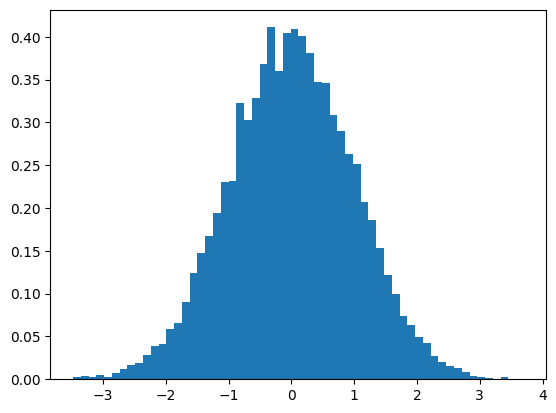

In [34]:
x = np.random.uniform(size=10000)
y = stats.norm.ppf(x)
plt.hist(y, density=True, bins='auto')

In [ ]:
import scipy.stats.qmc

In [38]:
2**13

8192

(array([0.0037696 , 0.00753919, 0.01507838, 0.02638717, 0.04900474,
        0.0791615 , 0.12062705, 0.16963179, 0.2337149 , 0.29402843,
        0.35057236, 0.38449871, 0.3958075 , 0.38826831, 0.34680276,
        0.29402843, 0.22994531, 0.17340138, 0.12062705, 0.0753919 ,
        0.04900474, 0.02638717, 0.01507838, 0.00753919, 0.0037696 ]),
 array([-3.23601223, -2.97694927, -2.71788631, -2.45882334, -2.19976038,
        -1.94069742, -1.68163446, -1.4225715 , -1.16350854, -0.90444558,
        -0.64538262, -0.38631966, -0.1272567 ,  0.13180626,  0.39086923,
         0.64993219,  0.90899515,  1.16805811,  1.42712107,  1.68618403,
         1.94524699,  2.20430995,  2.46337291,  2.72243587,  2.98149883,
         3.2405618 ]),
 <BarContainer object of 25 artists>)

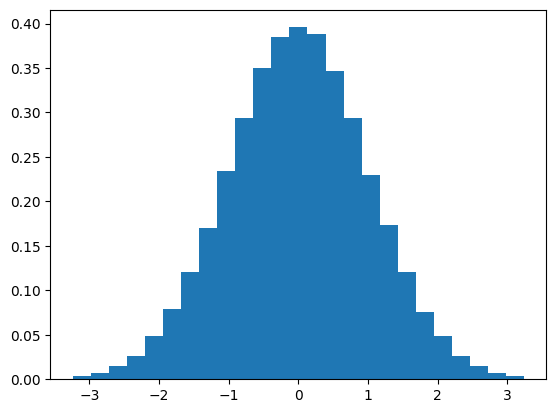

In [40]:
sobol = stats.qmc.Sobol(1)
x = sobol.random_base2(10)
y = stats.norm.ppf(x)
plt.hist(y, density=True, bins='auto')